In [1]:
!pip install -r requirements.txt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# Start 
import numpy as np
import pandas as pd
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import json
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from nltk import word_tokenize
import nltk
from scipy import stats
import scipy
import statsmodels.api as sm

> # <center> *HOSPITAL UNIVERSITARIO DEL VALLE “EVARISTO GARCIA” E.S.E*
# <center>  *RETO TRAUMA*

 


---



**By  :  ARLEY FERNANDO TORRES | JOSE LUIS GOMEZ  | MANUEL ALFREDO FIGUEREDO | SEBASTIAN ESPINOSA | SEBASTIAN HURTADO | SIMON GALEANO**


---

# 1. INTRODUCTION
The University Hospital of Valle must attend a large population of victims of personal injuries; only 7081 in 2012. This population generates a high cost for the health system, so the hospital is interested in knowing this population and its behavior over the last 5 years. It is expected to know the costs that these generate to the health system and to be able to create proposals of programs for the promotion and prevention of violence.

## 1.1 Business Context
___

In the meetings held with the Hospital Universitario del Valle, there are 3 main objectives: 

1. To obtain structured information on trauma patients that will allow us to know their care needs.
2. To establish a baseline of the costs of care that can be monitored as the operation of the service improves.3. To know the AVPP of the patients and the costs for the health system and the productive apparatus of society.

To this end, the hospital must provide us with additional information, since the information provided so far is not sufficient for this purpose.  The information provided only has the values grouped at the invoice level, but there is no detail of the services actually rendered. For this purpose, the institution must provide us with Supplies database,Drug database, Socioeconomic information and Medical History Information. For the moment, this is an advance in the EDA of the initially shared source, but we should delve into the other sources that the hospital provides us with. The following are the preliminary results of EDA. 

#   **2. DATA SOURCE**

---


In [3]:
data1 = pd.read_csv('/work/Nueva Base 22-06-22/trauma2018-2022proceso20220624_v2.txt',sep="|", 
                 header = None, error_bad_lines=False, index_col=False)

b'Skipping line 303572: expected 34 fields, saw 35\n'
b'Skipping line 336325: expected 34 fields, saw 35\nSkipping line 336328: expected 34 fields, saw 35\n'
b'Skipping line 369189: expected 34 fields, saw 35\n'
b'Skipping line 432833: expected 34 fields, saw 35\n'
b'Skipping line 468671: expected 34 fields, saw 35\nSkipping line 468672: expected 34 fields, saw 35\n'
b'Skipping line 501331: expected 34 fields, saw 35\nSkipping line 501336: expected 34 fields, saw 35\nSkipping line 502847: expected 34 fields, saw 35\n'
b'Skipping line 534460: expected 34 fields, saw 35\n'
b'Skipping line 567204: expected 34 fields, saw 35\nSkipping line 567208: expected 34 fields, saw 35\n'
b'Skipping line 671852: expected 34 fields, saw 35\n'
b'Skipping line 698798: expected 34 fields, saw 35\nSkipping line 698803: expected 34 fields, saw 35\nSkipping line 699292: expected 34 fields, saw 35\n'
b'Skipping line 732063: expected 34 fields, saw 35\nSkipping line 732568: expected 34 fields, saw 35\n'
b'Skip

In [4]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,20,637262,2018,11,284132,1,LEIDER ALBEIRO VELASCO MU�OZ,814000337,EMSSANAR E.S.S,...,A,S611,M,1.0,77800.0,1982/07/04,HERIDA DE DEDO(S) DE LA MANO CON DA�O DE LA(S)...,AMPUTACION TRAUMATICA DE OTRO DEDO UNICO (COMP...,ESTANCIA MANUAL,NaN
1,1,20,626604,2018,10,282923,1,EDWIN DAVID GARCIA MORENO,890399029,DEPTO DEL VALLE DEL CAUCA,...,A,S099,M,1.0,30700.0,1990/04/02,TRAUMATISMO DE LA CABEZA NO ESPECIFICADO,FRACTURAS MULTIPLES DE HUESOS METACARPIANOS,LABORATORIO CLINICO,NaN
2,1,20,490659,2018,3,170856,1,EDISON GIOVANNY RIOS OSORIO,890303093,COMFENALCO VALLE,...,I,S218,M,1.0,24100.0,1993/05/22,HERIDAS DE OTRAS PARTES DEL TORAX,HERIDAS DE OTRAS PARTES DEL TORAX,LABORATORIO CLINICO,NaN
3,1,20,490659,2018,3,170856,1,EDISON GIOVANNY RIOS OSORIO,890303093,COMFENALCO VALLE,...,I,S218,M,1.0,9800.0,1993/05/22,HERIDAS DE OTRAS PARTES DEL TORAX,HERIDAS DE OTRAS PARTES DEL TORAX,LABORATORIO CLINICO,NaN
4,1,20,490659,2018,3,170856,1,EDISON GIOVANNY RIOS OSORIO,890303093,COMFENALCO VALLE,...,I,S218,M,1.0,9300.0,1993/05/22,HERIDAS DE OTRAS PARTES DEL TORAX,HERIDAS DE OTRAS PARTES DEL TORAX,LABORATORIO CLINICO,NaN


In [5]:
data1.shape

(1584935, 34)

In [6]:
data1 = data1.drop([32],axis=1)

In [7]:
dict_trauma_new = pd.read_csv('/work/Nueva Base 22-06-22/dic_last_trauma).txt',sep ='\t', header = None)
col_trauma_new = dict_trauma_new[1].tolist()
len(col_trauma_new)

33

In [8]:
print(col_trauma_new)

['fuente_evento', 'Fuente Facturacion', 'Numero factura fiscal', 'año factura fiscal', 'mes factura fiscal', 'historia clinica  PK', 'secuencia ingreso PK', 'nombre paciente', 'codigo responsable', 'responsable EPS', 'valor factura fiscal', 'concepto facturacion asociado al servicio venta', 'CUPs - Actividad', 'centro de costo', 'nombre cups - actividad', 'tipo POS', 'codigo sala clinica egreso', 'nombre sala clinica egreso', 'fecha actividad', 'fecha ingreso', 'fecha egreso', 'codigo tipo identificacion paciente', 'numero de identificacion del paciente', 'cie10 egreso', 'Causa Egreso', 'cie10 ingreso', 'genero - sexo', 'cantidad cups facturada', 'valor cups facturado', 'Fecha de nacimiento', 'cie10 egrdin', 'cie10 egreia', 'nombre correspondiente a cardetcon']


In [9]:
data1.columns = col_trauma_new
data1.sample(10)

,fuente_evento,Fuente Facturacion,Numero factura fiscal,año factura fiscal,mes factura fiscal,historia clinica PK,secuencia ingreso PK,nombre paciente,codigo responsable,responsable EPS,...,cie10 egreso,Causa Egreso,cie10 ingreso,genero - sexo,cantidad cups facturada,valor cups facturado,Fecha de nacimiento,cie10 egrdin,cie10 egreia,nombre correspondiente a cardetcon
1548492,1,70,280581,2021,12,2588669,1,BAYOLEE ISABELLA RESTREPO ROMAN,901021565S,EMSSANAR S.A.S,...,T312,A,T312,F,1.0,1026.0,2020/03/06,QUEMADURAS QUE AFECTAN DEL 20% AL 29% DE LA SU...,QUEMADURAS QUE AFECTAN DEL 20% AL 29% DE LA SU...,NaN
674119,1,20,465302,2018,1,232715,1,MARIA ISAURA TORRES LOPEZ,814000337,EMSSANAR E.S.S,...,S721,A,S720,F,-4.0,-2260.0,1932/04/23,FRACTURA DEL CUELLO DEL FEMUR,FRACTURA PERTROCANTERIANA,NaN
597269,1,70,80113,2021,2,2531200,1,LUIS MIGUEL ACOSTA,860037013M,COMPA�IA MUNDIAL DE SEGUROS,...,S099,A,T07X,M,1.0,3962.0,1990/08/19,TRAUMATISMOS MULTIPLES NO ESPECIFICADOS,TRAUMATISMO DE LA CABEZA NO ESPECIFICADO,NaN
583253,1,20,725741,2019,3,312750,1,LUZ ESTHER GUERRERO RAMIREZ,900226715,COOSALUD ENTIDAD PROMOTORA DE,...,T243,A,T241,F,5.0,2160.0,1966/02/01,QUEMADURA DE LA CADERA Y DEL MIEMBRO INFERIOR ...,QUEMADURA DE LA CADERA Y DEL MIEMBRO INFERIOR ...,NaN
138353,1,20,816183,2019,6,338857,1,VICTOR MANUEL ROMERO PUENTE,901021565S,EMSSANAR S.A.S,...,T233,A,T233,M,1.0,594600.0,1965/08/17,QUEMADURA DE LA MU�ECA Y DE LA MANO DE TERCER ...,QUEMADURA DE LA MU�ECA Y DE LA MANO DE TERCER ...,NaN
918428,1,20,1022503,2020,1,318400,3,ABDIEL AZARIAS PI�A GARCIA,800130907-4,SALUD TOTAL EPS,...,S424,A,S400,M,1.0,2800.0,2017/11/22,CONTUSION DEL HOMBRO Y DEL BRAZO,FRACTURA DE LA EPIFISIS INFERIOR DEL HUMERO,NaN
181602,1,70,319029,2022,2,2605617,1,CRISTHIAN EDILSON BUITRAGO GARCIA,860009578,SEGUROS DEL ESTADO S.A,...,S098,A,S098,M,4.0,497200.0,1997/07/23,OTROS TRAUMATISMOS DE LA CABEZA ESPECIFICADOS,OTROS TRAUMATISMOS DE LA CABEZA ESPECIFICADOS,NaN
1197302,1,70,319837,2022,3,2608646,1,DANIEL CAMAYO TINTINAGO,860037013M,COMPA�IA MUNDIAL DE SEGUROS,...,S019,A,S019,M,1.0,3402.0,2003/11/28,HERIDA DE LA CABEZA PARTE NO ESPECIFICADA,HERIDA DE LA CABEZA PARTE NO ESPECIFICADA,NaN
767981,1,20,841036,2019,7,123100,2,EIDER ANDRES OCORO PINILLO,901021565S,EMSSANAR S.A.S,...,S370,A,W348,M,1.0,3600.0,1999/03/27,DISPARO DE OTRAS ARMAS DE FUEGO Y LAS NO ESPEC...,TRAUMATISMO DEL RI�ON,NaN
31441,1,70,351367,2022,4,75740,1,CRISTIAN MOSQUERA .,890399029,DEPTO DEL VALLE DEL CAUCA,...,T908,A,T07X,M,1.0,60779.0,1988/10/17,TRAUMATISMOS MULTIPLES NO ESPECIFICADOS,SECUELAS DE OTROS TRAUMATISMOS ESPECIFICADOS D...,NaN


In [10]:
data1.columns

Index(['fuente_evento', 'Fuente Facturacion', 'Numero factura fiscal',
       'año factura fiscal', 'mes factura fiscal', 'historia clinica  PK',
       'secuencia ingreso PK', 'nombre paciente', 'codigo responsable',
       'responsable EPS', 'valor factura fiscal',
       'concepto facturacion asociado al servicio venta', 'CUPs - Actividad',
       'centro de costo', 'nombre cups - actividad', 'tipo POS',
       'codigo sala clinica egreso', 'nombre sala clinica egreso',
       'fecha actividad', 'fecha ingreso', 'fecha egreso',
       'codigo tipo identificacion paciente',
       'numero de identificacion del paciente', 'cie10 egreso', 'Causa Egreso',
       'cie10 ingreso', 'genero - sexo', 'cantidad cups facturada',
       'valor cups facturado', 'Fecha de nacimiento', 'cie10 egrdin',
       'cie10 egreia', 'nombre correspondiente a cardetcon'],
      dtype='object')

In [11]:
NoInvoices1 = data1['Numero factura fiscal'].nunique()
print(f'The Number of rows data set is: {data1.shape[0]} rows ' +
        f'and the number of unique Invoice No is  {NoInvoices1}')

The Number of rows data set is: 1584935 rows and the number of unique Invoice No is  38656


## 2.1 Data First approach and cleaning

The first thing to do is to check that the data type of each column corresponds to what is expected. 

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584935 entries, 0 to 1584934
Data columns (total 33 columns):
 #   Column                                           Non-Null Count    Dtype  
---  ------                                           --------------    -----  
 0   fuente_evento                                    1584935 non-null  int64  
 1   Fuente Facturacion                               1584935 non-null  object 
 2   Numero factura fiscal                            1584935 non-null  int64  
 3   año factura fiscal                               1584935 non-null  int64  
 4   mes factura fiscal                               1584935 non-null  int64  
 5   historia clinica  PK                             1584935 non-null  int64  
 6   secuencia ingreso PK                             1584935 non-null  int64  
 7   nombre paciente                                  1581172 non-null  object 
 8   codigo responsable                               1584935 non-null  object 
 9   re

In [13]:
#Convert Date to datetime Dtype
data1[['fecha actividad','fecha ingreso','fecha egreso','Fecha de nacimiento']] = data1[['fecha actividad','fecha ingreso','fecha egreso','Fecha de nacimiento']].apply(pd.to_datetime,format='%Y/%m/%d' ,errors='coerce')


Some patients do not have an EPS, so in the EPS responsible and responsible code columns the patient's data is entered. Therefore, in order to perform an analysis we will group these data in a group of independent, and a code 000 that will represent those who come without any type of EPS. 

In [14]:
data1.loc[data1['codigo responsable'] == data1['numero de identificacion del paciente'], 'responsable EPS'] = 'independiente'
data1.loc[data1['codigo responsable'] == data1['numero de identificacion del paciente'], 'codigo responsable'] = '000'


In [15]:
data1['responsable EPS'].value_counts().rename_axis('unique_values').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,224,225,226,227,228,229,230,231,232,233
unique_values,EMSSANAR S.A.S,COOSALUD ENTIDAD PROMOTORA DE,EMSSANAR E.S.S,DEPTO DEL VALLE DEL CAUCA,ASMET SALUD EPS SAS,DEPARTAMENTO DEL VALLE DEL CAU,MEDIMAS EPS S.A.S SUBSIDIADO,NUEVA EPS,MEDIMAS EPS S.A.S CONTRIBUTIVO,S.O.S. SERV.OCCID.DE SALUD EPS,...,JESUS GABRIEL ZORRILLO .,YULIANA ANDREA BLANDON,DORA LILIANA RAMIREZ BEDOYA,ARS COMFAMILIAR HUILA,CAROLINA SANCHEZ BROYER,FUNDACION BANCO DE TEJIDOS HUM,ALMEIRO CASTILLO CAMELO,SECRETARIA SALUD ATLANTICO,DASSSALUD SUCRE,ANGELICA MARIA CARVAJAL
counts,379093,244564,153041,105605,93385,90151,59746,45570,40092,28887,...,2,2,2,1,1,1,1,1,1,1


In [16]:
data1['codigo responsable'].value_counts().rename_axis('unique_values').reset_index(name='counts').T


,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
unique_values,901021565S,900226715,814000337,890399029,900935126S,890399029VZ,901097473S,901097473C,900156264,805001157,...,1107062928,900328323,890102006,892280016,30736456,8911800SNOP,29110647,891600091C,80383252,811039913
counts,355986,216979,145886,105605,88383,66349,59746,40092,31269,28939,...,2,2,1,1,1,1,1,1,1,1


It is observed that there are variations in the names of the EPS either for contributory regime or other reasons, so the clinic will be asked about the reason for these variations.  Additionally, when calling the code of the eps, we see that it corresponds to the NIT (tax identification number) and has the structure of the number (9 digits) and some contain an additional digit or letter, which creates variations of the same code, for analysis purposes we will create an additional column of 'NIT_EPS' that will call the first 9 digits of the 'responsible code'. 


In [17]:
#Remove all letter from codigo responsable

data1['NIT_EPS'] = data1['codigo responsable'].str.extract('(\d+)')
data1['NIT_EPS'].astype(str)
#keep just first 9 numbers in case the NIT contains the verification number
data1['NIT_EPS'] = data1['NIT_EPS'].str[0:9]
data1['NIT_EPS'].value_counts()


901021565    372235
900226715    240991
890399029    178350
814000337    153041
901097473     99971
              ...  
8911800           1
892280016         1
30736456          1
811039913         1
29110647          1
Name: NIT_EPS, Length: 205, dtype: int64

In [18]:
data1['codigo responsable'].nunique()

275

In [19]:
print(f'Number of unique codigo responsable: {data1["codigo responsable"].nunique()}')
print(f'Number of unique NIT_EPS: {data1["NIT_EPS"].nunique()}')

Number of unique codigo responsable: 275
Number of unique NIT_EPS: 205


We note that we were able to better group the codes of the responsible EPS, also in those in which the code did not contain a number will be NaN.

In [20]:
data1[data1['NIT_EPS'].isnull()]

,fuente_evento,Fuente Facturacion,Numero factura fiscal,año factura fiscal,mes factura fiscal,historia clinica PK,secuencia ingreso PK,nombre paciente,codigo responsable,responsable EPS,...,Causa Egreso,cie10 ingreso,genero - sexo,cantidad cups facturada,valor cups facturado,Fecha de nacimiento,cie10 egrdin,cie10 egreia,nombre correspondiente a cardetcon,NIT_EPS
1248,1,20,516571,2018,4,239651,1,BRAYAN ANDRES HURTADO MURILLO,ASMET CONTRIBUTIVO,ASMET SALUD EPS SAS,...,A,X938,M,1.0,26800.0,1997-06-28,AGRESION CON DISPARO DE ARMA CORTA: OTRO LUGAR...,TRAUMATISMO DEL HIGADO Y DE LA VESICULA BILIAR,NaN,NaN
1249,1,20,516571,2018,4,239651,1,BRAYAN ANDRES HURTADO MURILLO,ASMET CONTRIBUTIVO,ASMET SALUD EPS SAS,...,A,X938,M,2.0,36800.0,1997-06-28,AGRESION CON DISPARO DE ARMA CORTA: OTRO LUGAR...,TRAUMATISMO DEL HIGADO Y DE LA VESICULA BILIAR,NaN,NaN
1250,1,20,516571,2018,4,239651,1,BRAYAN ANDRES HURTADO MURILLO,ASMET CONTRIBUTIVO,ASMET SALUD EPS SAS,...,A,X938,M,1.0,18400.0,1997-06-28,AGRESION CON DISPARO DE ARMA CORTA: OTRO LUGAR...,TRAUMATISMO DEL HIGADO Y DE LA VESICULA BILIAR,NaN,NaN
1340,1,20,516399,2018,4,248649,1,JUAN PABLO MONTOYA CASTA�O,ASMET SUBSIDIADO,ASMET SALUD EPS SAS,...,A,S211,M,1.0,44500.0,2000-10-31,HERIDA DE LA PARED ANTERIOR DEL TORAX,HEMONEUMOTORAX TRAUMATICO,NaN,NaN
1637,1,20,532511,2018,5,235217,1,KAREN YULIETH RENTERIA CUERO,ASMET SUBSIDIADO,ASMET SALUD EPS SAS,...,A,T313,F,1.0,17000.0,2010-09-05,QUEMADURAS QUE AFECTAN DEL 30% AL 39% DE LA SU...,QUEMADURAS DE MULTIPLES REGIONES CON MENCION A...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555207,1,20,532511,2018,5,235217,1,KAREN YULIETH RENTERIA CUERO,ASMET SUBSIDIADO,ASMET SALUD EPS SAS,...,A,T313,F,6.0,9678.0,2010-09-05,QUEMADURAS QUE AFECTAN DEL 30% AL 39% DE LA SU...,QUEMADURAS DE MULTIPLES REGIONES CON MENCION A...,NaN,NaN
1555208,1,20,532511,2018,5,235217,1,KAREN YULIETH RENTERIA CUERO,ASMET SUBSIDIADO,ASMET SALUD EPS SAS,...,A,T313,F,2.0,3294.0,2010-09-05,QUEMADURAS QUE AFECTAN DEL 30% AL 39% DE LA SU...,QUEMADURAS DE MULTIPLES REGIONES CON MENCION A...,NaN,NaN
1555209,1,20,532511,2018,5,235217,1,KAREN YULIETH RENTERIA CUERO,ASMET SUBSIDIADO,ASMET SALUD EPS SAS,...,A,T313,F,4.0,984.0,2010-09-05,QUEMADURAS QUE AFECTAN DEL 30% AL 39% DE LA SU...,QUEMADURAS DE MULTIPLES REGIONES CON MENCION A...,NaN,NaN
1555210,1,20,532511,2018,5,235217,1,KAREN YULIETH RENTERIA CUERO,ASMET SUBSIDIADO,ASMET SALUD EPS SAS,...,A,T313,F,1.0,1318.0,2010-09-05,QUEMADURAS QUE AFECTAN DEL 30% AL 39% DE LA SU...,QUEMADURAS DE MULTIPLES REGIONES CON MENCION A...,NaN,NaN


In [21]:
data1.isnull().sum()

fuente_evento                                            0
Fuente Facturacion                                       0
Numero factura fiscal                                    0
año factura fiscal                                       0
mes factura fiscal                                       0
historia clinica  PK                                     0
secuencia ingreso PK                                     0
nombre paciente                                       3763
codigo responsable                                       0
responsable EPS                                          0
valor factura fiscal                                     0
concepto facturacion asociado al servicio venta          0
CUPs - Actividad                                         0
centro de costo                                          0
nombre cups - actividad                                  0
tipo POS                                                72
codigo sala clinica egreso                              

We found that there are 3,763 missing patient data, but this data is not relevant for the research since it is observed that even without having an associated name, if there is a clinical history of that patient and the rest of the data is available, this is because sometimes N.N. (John Doe) arrives, so this data will be missing. 

Also the 'cardetcon name' is NaN in each row, so we will verify with the hospital if the column is important, if not we can drop de column. 


In [22]:
for col in data1.columns:
    print(f"{col}\t has\t:\t {data1[col].nunique()} \t, Unique Values")

fuente_evento	 has	:	 1 	, Unique Values
Fuente Facturacion	 has	:	 7 	, Unique Values
Numero factura fiscal	 has	:	 38656 	, Unique Values
año factura fiscal	 has	:	 5 	, Unique Values
mes factura fiscal	 has	:	 12 	, Unique Values
historia clinica  PK	 has	:	 33168 	, Unique Values
secuencia ingreso PK	 has	:	 28 	, Unique Values
nombre paciente	 has	:	 33176 	, Unique Values
codigo responsable	 has	:	 275 	, Unique Values
responsable EPS	 has	:	 234 	, Unique Values
valor factura fiscal	 has	:	 32819 	, Unique Values
concepto facturacion asociado al servicio venta	 has	:	 29 	, Unique Values
CUPs - Actividad	 has	:	 12289 	, Unique Values
centro de costo	 has	:	 119 	, Unique Values
nombre cups - actividad	 has	:	 12014 	, Unique Values
tipo POS	 has	:	 4 	, Unique Values
codigo sala clinica egreso	 has	:	 101 	, Unique Values
nombre sala clinica egreso	 has	:	 69 	, Unique Values
fecha actividad	 has	:	 2010 	, Unique Values
fecha ingreso	 has	:	 1834 	, Unique Values
fecha egreso	

##  2.2 Creating a subset data 
___

The database shows repeated invoices, this is due to the fact that the invoice is shown each time the CUPS, i.e. the service, is modified. It is like seeing the invoices discriminated by service but they are still the same invoice.  

Therefore to make real statistics of clients we will create a new database that shows only each invoice number once. 

In [23]:
data1_unique = data1.drop_duplicates(subset=['Numero factura fiscal'],keep='first')
data1_unique.shape

(38656, 34)

In [24]:
data1_unique.shape

(38656, 34)

In [25]:
data1_unique.columns

Index(['fuente_evento', 'Fuente Facturacion', 'Numero factura fiscal',
       'año factura fiscal', 'mes factura fiscal', 'historia clinica  PK',
       'secuencia ingreso PK', 'nombre paciente', 'codigo responsable',
       'responsable EPS', 'valor factura fiscal',
       'concepto facturacion asociado al servicio venta', 'CUPs - Actividad',
       'centro de costo', 'nombre cups - actividad', 'tipo POS',
       'codigo sala clinica egreso', 'nombre sala clinica egreso',
       'fecha actividad', 'fecha ingreso', 'fecha egreso',
       'codigo tipo identificacion paciente',
       'numero de identificacion del paciente', 'cie10 egreso', 'Causa Egreso',
       'cie10 ingreso', 'genero - sexo', 'cantidad cups facturada',
       'valor cups facturado', 'Fecha de nacimiento', 'cie10 egrdin',
       'cie10 egreia', 'nombre correspondiente a cardetcon', 'NIT_EPS'],
      dtype='object')

In [26]:
data1_unique['numero de identificacion del paciente'].nunique()

33166

In [27]:
data1_unique[data1_unique['genero - sexo']=='M']['numero de identificacion del paciente'].nunique()

22456

### RECIDIVISM

* By having a unique invoice number of 38656 we can begin a more accurate exploration of the patients served by the hospital.  The first thing we will look at is patient recidivism.  
    Since each patient keeps the patient's medical record number as a unique identifier, we will see how many times each medical record is repeated, i.e. how many times a patient visits the hospital at different points in time. 
    


In [28]:
data1_unique['historia clinica  PK'].nunique()

33166

In [29]:
reincidencia0 = data1_unique['historia clinica  PK'].value_counts().rename_axis('unique_values').reset_index(name='counts')
reincidencia = reincidencia0[reincidencia0['counts']>1]
reincidencia.shape

(4026, 2)

In [30]:
Perc_Reinc = (reincidencia.shape[0]/data1_unique['historia clinica  PK'].nunique())*100
print(f'The percentage of patience that visit the hospital more than once is : {round(Perc_Reinc,2)}%')

The percentage of patience that visit the hospital more than once is : 12.14%


It is found that there are 33,166 unique patients who have been treated for trauma of which 4,026 have been to the hospital 2 or more times. 

In [31]:
fig = px.histogram(reincidencia,x='counts',title='Number of visits to hospital of each patient',text_auto=True)
fig.show()

As we can see, the majority of patients who visit the hospital more than once only visit twice, very few visit more than 5 times, which we find normal given that we are observing a period of 5 years.

In [32]:
reincidencia0['percentage'] = round((reincidencia0['counts']/reincidencia0.shape[0])*100,2)
fig = px.pie(reincidencia0, values='counts', names='counts', title='Number of visits of each patiente')
fig.show()


When looking at the number of times each patient visits the hospital; including those who only go once, we found that more than 90% of patients go 1 or 2 times, so we did not observe a problem in recidivism in trauma patients. 

### PATIENTS BY GENDER

In [33]:
data1['genero - sexo'].value_counts()

M    1180200
F     404389
I        346
Name: genero - sexo, dtype: int64

In [34]:
fig = px.sunburst(data1_unique, path=['año factura fiscal', 'genero - sexo'], 
             title='Patient Gender')
fig.update_traces(textinfo="label+percent parent")
fig.show()

In [35]:
fig = px.histogram(data1_unique, x='año factura fiscal', color='genero - sexo',barmode='overlay',
        title='Entrance by year grouped by Gender')
fig.show()

Throughout these years we can see that there is a constant proportion of trauma patients, with a ratio of 70:30, with more and more men attending. 

### AGE

In [36]:
data1_unique['Age'] = round((data1_unique['fecha ingreso']-data1_unique['Fecha de nacimiento'])/ np.timedelta64(1, 'Y'),0)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
fig = px.histogram(data1_unique,x='Age',title='Number patients grouped by Age',nbins= 40 ,text_auto=True,color ='genero - sexo')
fig.show()

In [38]:
Gender_Age = data1_unique[['genero - sexo','Age']]

In [39]:
age_groups = pd.cut(Gender_Age['Age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,np.inf])
Grouped_Age_gender = pd.crosstab(age_groups, Gender_Age['genero - sexo']).reset_index()
Grouped_Age_gender['F'] = Grouped_Age_gender['F'] * -1


In [40]:
Grouped_Age_gender['Age'] = Grouped_Age_gender['Age'].astype(str)
Grouped_Age_gender['Age'] = Grouped_Age_gender['Age'].replace(',','-',regex=True)
Grouped_Age_gender['Age'] = Grouped_Age_gender['Age'].replace('\(','',regex=True)
Grouped_Age_gender['Age'] = Grouped_Age_gender['Age'].replace(']','',regex=True)


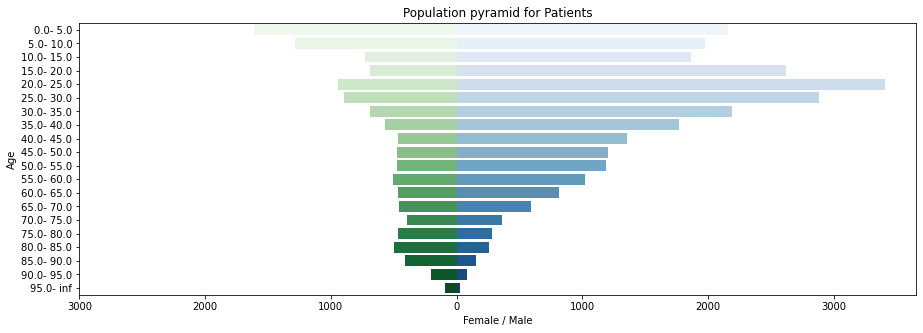

In [41]:
fig, _ = plt.subplots( figsize=(15,5))
ax1 = sns.barplot(x='M', y='Age', data=Grouped_Age_gender, palette="Blues")
ax2 = sns.barplot(x='F', y='Age', data=Grouped_Age_gender, palette="Greens")
plt.title("Population pyramid for Patients")
plt.xlabel("Female / Male")
plt.xticks(ticks=[-3000,-2000, -1000, 0, 1000, 2000,3000],labels=['3000','2000', '1000', '0', '1000', '2000','3000']);


In [42]:

y_age = Grouped_Age_gender['Age']
x_M = Grouped_Age_gender['M']
x_F = Grouped_Age_gender['F']
# Creating instance of the figure
fig = go.Figure()
  
# Adding Male data to the figure
fig.add_trace(go.Bar(y= y_age, x = x_M, name = 'Male', orientation = 'h'))
  
# Adding Female data to the figure
fig.add_trace(go.Bar(y = y_age, x = x_F,name = 'Female', orientation = 'h'))
fig.update_layout(title = 'Population Pyramid of Patients',
                 title_font_size = 22, barmode = 'relative',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-3000, -2000, -1000,0, 1000, 2000,3000],                                
                              ticktext = ['3000', '2000', '1000', '0', '1000', '2000', '3000'])
                 )
fig.update_xaxes(tickvals=[-3000, -2000, -1000,0, 1000, 2000,3000])
fig.show()

It is found that as age advances the gender difference decreases, and from the age of 70 onwards more women than men visit the hospital for trauma.

In [43]:
Grouped_Age_gender_percentage = Grouped_Age_gender.copy()
Grouped_Age_gender_percentage[['F','I','M']]=Grouped_Age_gender[['F','I','M']].apply(lambda x:abs(x*100/sum(abs(x))),axis=1)
fig = go.Figure()
fig.add_trace(go.Bar(y= Grouped_Age_gender_percentage['M'], x = Grouped_Age_gender_percentage['Age'], name = 'Male'))
fig.add_trace(go.Bar(y= Grouped_Age_gender_percentage['F'], x = Grouped_Age_gender_percentage['Age'], name = 'Female'))
fig.add_trace(go.Bar(y= Grouped_Age_gender_percentage['I'], x = Grouped_Age_gender_percentage['Age'], name = 'Undefined'))
fig.update_layout(barmode='stack', title='Percentage Age distribution per Gender',xaxis={'title':'AGE'},yaxis={'title':'PERCENTAGE'})
fig.show()

### DIAGNOSIS

In [44]:
data1_unique['cie10 egrdin'].nunique()

1363

In [45]:
Ingreso = data1_unique.groupby('cie10 egrdin').size().to_frame(name='count').reset_index().sort_values(['count'], ascending=False)
Ingreso_top = Ingreso.head(20)
fig = px.histogram(Ingreso_top, x='cie10 egrdin', y='count',title='ENTRANCE DIAGNOSIS')
fig.update_layout(font_size=7)
fig.show()

In [46]:
Egreso = data1_unique.groupby('cie10 egreia').size().to_frame(name='count').reset_index().sort_values(['count'], ascending=False)
Egreso_top = Egreso.head(20)
fig = px.funnel(Egreso_top, y='cie10 egreia', x='count',title='LEAVING DIAGNOSIS ')
fig.update_layout(font_size=7)
fig.show()

434858


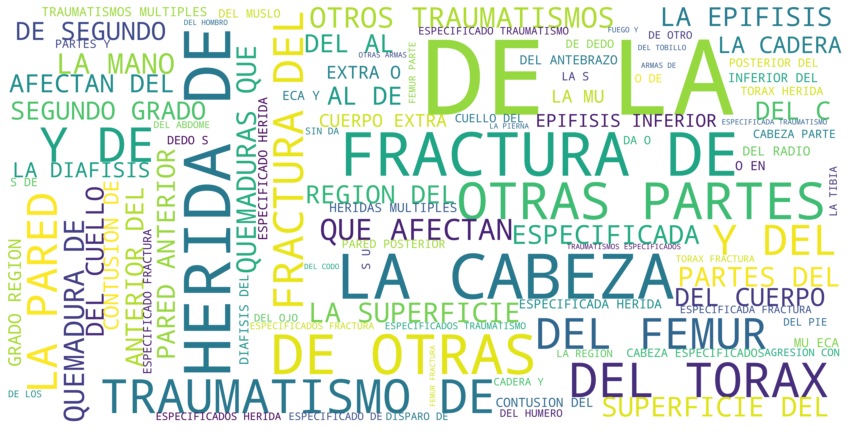

In [47]:
word_cloud_text = ' '.join(data1_unique['cie10 egrdin'][:10000])
print(len(word_cloud_text))

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
import nltk
nltk.download('stopwords')

noise_words = []
stopwords_corpus = nltk.corpus.stopwords
stop_words = stopwords_corpus.words('spanish')
noise_words.extend(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
nltk.download('punkt')
text_tokens = word_tokenize(word_cloud_text)
noise_words = [x.upper() for x in noise_words]
tokens_without_sw = [word for word in text_tokens if not word in noise_words]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
word_cloud_tex_2 = ' '.join(tokens_without_sw)
wordcloud2 = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=1600,
    height=800
).generate(word_cloud_tex_2)

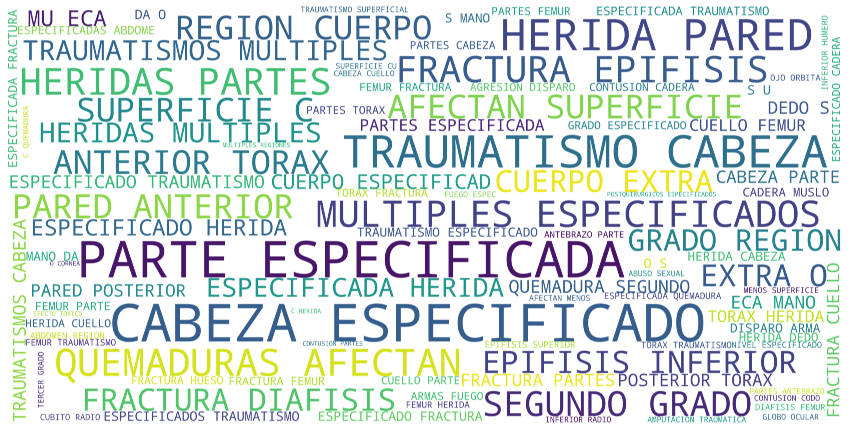

In [51]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

### TIME LAPSE

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



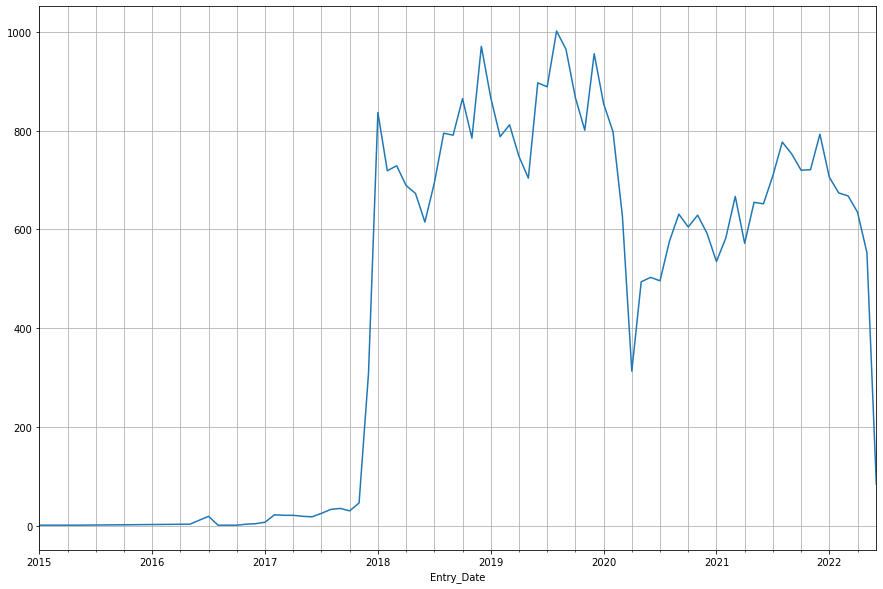

In [52]:
data1_unique['Entry_Date'] = data1_unique['fecha ingreso'] .dt.to_period('m')
Entry_Date = data1_unique.groupby('Entry_Date').size()
fig, _ = plt.subplots( figsize=(15,10))
Entry_Date.plot.line()
plt.grid(which = "both");

In [53]:
by_month = pd.to_datetime(data1_unique['fecha ingreso']).dt.to_period('d').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('month').reset_index(name='counts')
fig = go.Figure(data=go.Scatter(x=df_month['month'].astype(dtype=str), 
                        y=df_month['counts'],
                        marker_color='indianred',#color=df_month['month'].dt.strftime('%y'),
                        text="counts"))
fig.update_layout({"title": 'Number of patients visiting the hospital',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Patients"}})
fig.show()

In the graphs we can see that there are data, very few, before 2018, we should ask the hospital the reason because the database gives billing from 2018 to 2022, in these graphs we observe the day of admission of the patient. 

Likewise, we have not seen an annual trend that repeats itself. in order to observe better we will make individual year graphs.

In [54]:
by_month = pd.to_datetime(data1_unique['fecha ingreso']).dt.to_period('m').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('month').reset_index(name='PATIENTS')
df_month =df_month[df_month['month']>='2018-01']
df_month["months"] = df_month["month"].dt.strftime('%m')
df_month["years"] = df_month["month"].dt.strftime('%y')
fig = px.line(df_month, x='months', y='PATIENTS', color='years',range_x=(0,11))

fig.show()


It is difficult to see a trend since it must be taken into account that 2020 was the pandemic and it is noted that patients were historically low during that year. 

DAYS
___



In [55]:
by_day = data1_unique['fecha ingreso'].value_counts().sort_index()
df_day = by_day.rename_axis('DATE').reset_index(name='counts')
df_day =df_day[df_day['DATE']>='2018-01-01']
df_day['WEEK_DAY'] = df_day['DATE'].dt.day_name()
days = pd.api.types.CategoricalDtype(categories=['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday','Sunday'], ordered=True)
df_day['WEEK_DAY'] = df_day['WEEK_DAY'].astype(days)
fig = px.histogram(df_day, x='WEEK_DAY', y='counts', barmode='group',
             histfunc='avg')

fig.show()


## INVOICE VALUE ANALYSIS

In [56]:
fig = px.histogram(data1_unique, x='valor factura fiscal', color='genero - sexo',barmode='overlay')
fig.show()

In [57]:
fig = px.box(data1_unique, x='genero - sexo', y='valor factura fiscal',
             notched=True)

fig.show()

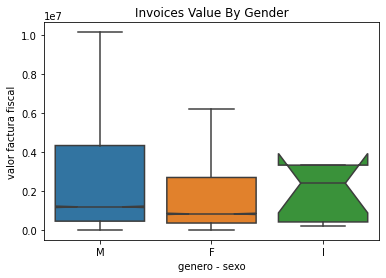

In [58]:
sns.boxplot(data= data1_unique, x='genero - sexo', y='valor factura fiscal', notch = True,
            showfliers = False).set_title(f'Invoices Value By Gender');

In [59]:
test, p_valor, df = sm.stats.ttest_ind(data1_unique.groupby('genero - sexo').get_group('M')['valor factura fiscal'], data1_unique.groupby('genero - sexo').get_group('F')['valor factura fiscal'])
print(p_valor)

1.7456358139472712e-28


There is sufficient statistical evidence to determine that a male trauma patient pays a higher bill than a female patient.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1e4d9401-3211-41d8-9bf6-5ad8c8a1c775' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>